# Burnout in the Tech Industry

Burnout is the result of excessive and prolonged stress in the workplace. It impacts you physically, emotionally, and mentally. It has a negative impact on work performance as well.

Here is a short video about burnout.

After working as a teacher for 8 years, I saw many colleagues struggle with burnout and some leave the profession as a result. I wondered was this a concern for my new career and decided to investigate.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

Initially I considered using multiple databases. However, after a quick EDA I realized two of the datasets would now work. Below is one of the datasets I decided not to use. While the column `Daily_Shouting` is intriguing, there was no connection to work, so I decided to save this for another time. 

In [2]:
survey_df = pd.read_csv('data/Wellbeing_and_lifestyle_data.csv')

In [5]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [195]:
survey_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female


I decided to focus on a Survey that had been conducted from 2014 - 2019. Here, participants in the tech indutry answered 118 questions about themselves and their job.
- Note there is no data for 2015
- Some of the questions were not initially asked in 2014 or 2016

In [7]:
con = sqlite3.connect('data/mental_health.sqlite')
survey_year_df = pd.read_sql_query("SELECT * from Survey", con)

In [8]:
survey_year_df.head()

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [9]:
question_df = pd.read_sql_query("SELECT * from Question", con)

In [10]:
question_df.loc[3]['questiontext']

'If you live in the United States, which state or territory do you live in?'

In [11]:
question_df.loc[103]['questiontext']

'Which of the following best describes your work position?'

I wanted to be able to get an idea of the questions asked. This way I could narrow down what I wanted to focus on.

In [12]:
question_df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental he...,7
7,How many employees does your company or organi...,8
8,Is your employer primarily a tech company/orga...,9
9,Does your employer provide mental health benef...,10


In [13]:
answer_df = pd.read_sql_query("SELECT * from Answer", con)

In [196]:
answer_df[answer_df['UserID'] == 2694].shape

(76, 4)

In [15]:
answer_df[answer_df['UserID'] == 2694]

,AnswerText,SurveyID,UserID,QuestionID
114441,27,2017,2694,1
115197,Female,2017,2694,2
115953,United Kingdom,2017,2694,3
116709,-1,2017,2694,4
117465,0,2017,2694,5
118221,No,2017,2694,6
118977,1,2017,2694,7
119733,100-500,2017,2694,8
120489,1,2017,2694,9
121245,No,2017,2694,10


I wanted to merge the two dataframes into one. However, first I needed to rename the columns in one of the dataframes for consistency and a proper merge.

In [16]:
question_df = question_df.rename(columns={"questiontext": "QuestionText", "questionid": "QuestionID"})

In [17]:
merged_df = question_df.merge(right = answer_df, how = 'outer', on = 'QuestionID')
merged_df.head()

,QuestionText,QuestionID,AnswerText,SurveyID,UserID
0,What is your age?,1,37,2014,1
1,What is your age?,1,44,2014,2
2,What is your age?,1,32,2014,3
3,What is your age?,1,31,2014,4
4,What is your age?,1,31,2014,5


Then I decided to reorganize the data frame to better view the information.

In [184]:
pivoted_df = pd.pivot_table(merged_df, values = 'AnswerText', index = ['SurveyID', 'UserID'], 
                            columns = ['QuestionText'], aggfunc = 'first')
pivoted_df.head()

QuestionText    Any additional notes or comments  \
SurveyID UserID                                    
2014     1                                    -1   
         2                                    -1   
         3                                    -1   
         4                                    -1   
         5                                    -1   

QuestionText    Are you openly identified at work as a person with a mental health issue?  \
SurveyID UserID                                                                             
2014     1                                                     NaN                          
         2                                                     NaN                          
         3                                                     NaN                          
         4                                                     NaN                          
         5                                                     NaN                          

QuestionText    Are you self-employed?  \
SurveyID UserID                          
2014     1                          -1   
         2                          -1   
         3                          -1   
         4                          -1   
         5                          -1   

QuestionText    Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.  \
SurveyID UserID                                                                                                                                     
2014     1                                                     NaN                                                                                  
         2                                                     NaN                                                                                  
         3                                                     NaN                                                                                  
         4                                                     NaN                                                                                  
         5                                                     NaN                                                                                  

QuestionText    Describe the circumstances of the badly handled or unsupportive response.  \
SurveyID UserID                                                                             
2014     1                                                     NaN                          
         2                                                     NaN                          
         3                                                     NaN                          
         4                                                     NaN                          
         5                                                     NaN                          

QuestionText    Describe the circumstances of the supportive or well handled response.  \
SurveyID UserID                                                                          
2014     1                                                     NaN                       
         2                                                     NaN                       
         3                                                     NaN                       
         4                                                     NaN                       
         5                                                     NaN                       

QuestionText    Describe the conversation with coworkers you had about your mental health including their reactions.  \
SurveyID UserID                                                                                                        
2014     1                                                     NaN                                                     
 

In [199]:
pivoted_df.reset_index().head()

QuestionText,SurveyID,UserID,Any additional notes or comments,Are you openly identified at work as a person with a mental health issue?,Are you self-employed?,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,Describe the circumstances of the badly handled or unsupportive response.,Describe the circumstances of the supportive or well handled response.,Describe the conversation with coworkers you had about your mental health including their reactions.,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Describe the conversation you had with your previous coworkers about your mental health including their reactions.,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Describe the conversation your coworker had with you about their mental health (please do not use names).,Describe the conversation your coworker had with you about their mental health (please do not use names)..1,Did you ever discuss your mental health with a previous coworker(s)?,Did you ever discuss your mental health with your previous employer?,Did you ever have a previous coworker discuss their or another coworker's mental health with you?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Do you believe your productivity is ever affected by a mental health issue?,Do you currently have a mental health disorder?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you feel that your employer takes mental health as seriously as physical health?,Do you have a family history of mental illness?,Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you have previous employers?,Do you know local or online resources to seek help for a mental health issue?,Do you know the options for mental health care available under your employer-provided health coverage?,Do you know the options for mental health care your employer provides?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,Do you work remotely (outside of an office) at least 50% of the time?,Do you work remotely?,Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Does your employer provide mental health benefits as part of healthcare coverage?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Has being identified as a person with a mental health issue affected your career?,Has your employer ever discussed mental health as part of an employee wellness program?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or o

In [201]:
pivoted_df = pivoted_df.replace({'male':'Male','female':'Female','binary':'Binary'})
pivoted_df.tail()

QuestionText    Any additional notes or comments  \
SurveyID UserID                                    
2019     4214                                NaN   
         4215                                NaN   
         4216                                NaN   
         4217                                NaN   
         4218                                NaN   

QuestionText    Are you openly identified at work as a person with a mental health issue?  \
SurveyID UserID                                                                             
2019     4214                                                    0                          
         4215                                                    0                          
         4216                                                    0                          
         4217                                                    0                          
         4218                                                    1                          

QuestionText    Are you self-employed?  \
SurveyID UserID                          
2019     4214                        0   
         4215                        1   
         4216                        1   
         4217                        0   
         4218                        0   

QuestionText    Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.  \
SurveyID UserID                                                                                                                                     
2019     4214                                                   -1                                                                                  
         4215                                                  IDK                                                                                  
         4216                                         sdsdsdsdsdsd                                                                                  
         4217                                      raise awareness                                                                                  
         4218    reduce stigma. offer options for part time wor...                                                                                  

QuestionText    Describe the circumstances of the badly handled or unsupportive response.  \
SurveyID UserID                                                                             
2019     4214                                                   -1                          
         4215    employee was ostracized and employer discussed...                          
         4216                                                   -1                          
         4217                                                   -1                          
         4218                                                   -1                          

QuestionText    Describe the circumstances of the supportive or well handled response.  \
SurveyID UserID                                                                          
2019     4214                                                   -1                       
         4215                                                   -1                       
         4216                                                   -1                       
         4217                                                   -1                       
         4218                                                   -1                       

QuestionText    Describe the conversation with coworkers you had about your mental health including their reactions.  \
SurveyID UserID                                                                                                        
2019     4214                                                   -1                                                     
 

In [202]:
pivoted_df.describe()

QuestionText,Any additional notes or comments,Are you openly identified at work as a person with a mental health issue?,Are you self-employed?,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,Describe the circumstances of the badly handled or unsupportive response.,Describe the circumstances of the supportive or well handled response.,Describe the conversation with coworkers you had about your mental health including their reactions.,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Describe the conversation you had with your previous coworkers about your mental health including their reactions.,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Describe the conversation your coworker had with you about their mental health (please do not use names).,Describe the conversation your coworker had with you about their mental health (please do not use names)..1,Did you ever discuss your mental health with a previous coworker(s)?,Did you ever discuss your mental health with your previous employer?,Did you ever have a previous coworker discuss their or another coworker's mental health with you?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Do you believe your productivity is ever affected by a mental health issue?,Do you currently have a mental health disorder?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you feel that your employer takes mental health as seriously as physical health?,Do you have a family history of mental illness?,Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you have previous employers?,Do you know local or online resources to seek help for a mental health issue?,Do you know the options for mental health care available under your employer-provided health coverage?,Do you know the options for mental health care your employer provides?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,Do you work remotely (outside of an office) at least 50% of the time?,Do you work remotely?,Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Does your employer provide mental health benefits as part of healthcare coverage?,Does your employer provide resources to learn more about mental health issues and how to seek help?,Has being identified as a person with a mental health issue affected your career?,Has your employer ever discussed mental health as part of an employee wellness program?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official co

Then I decided to take a look at characteristics of the participants that completed the survey from over the 5 years.

I want to get a count of `Gender`, `Age`, `Race`, and other descriptors.

In [54]:
x1 = pivoted_df.groupby(['SurveyID','What is your gender?']).count()
x1

QuestionText                                             Any additional notes or comments  \
SurveyID What is your gender?                                                               
2014     A little about you                                                             1   
         Agender                                                                        1   
         All                                                                            1   
         Androgyne                                                                      1   
         Enby                                                                           1   
         Female                                                                       247   
         Female (trans)                                                                 2   
         Genderqueer                                                                    1   
         Guy (-ish) ^_^                                                                 1   
         Male                                                                         991   
         Male-ish                                                                       1   
         Nah                                                                            1   
         Neuter                                                                         1   
         Trans woman                                                                    1   
         Trans-female                                                                   1   
         fluid                                                                          1   
         male leaning androgynous                                                       1   
         non-binary                                                                     1   
         ostensibly male, unsure what that really means                                 1   
         p                                                                              1   
         queer                                                                          1   
         queer/she/they                                                                 1   
         something kinda male?                                                          1   
2016     -1                                                                             0   
         AFAB                                                                           0   
         Agender                                                                        0   
         Androgynous                                                                    0   
         Bigender                                                                       0   
         Enby                                                                           0   
         Female                                                                         0   
         Female assigned at birth                                                       0   
         Female or Multi-Gender Femme                                                   0   
         Fluid                                                                          0   
         Genderfluid                                                                    0   
         Genderfluid (born female)                                                      0   
         Genderflux demi-girl                                                           0   
         Genderqueer                                                                    0   
         Human                                                                          0   
         Male                                                                           0   
         Male (trans, FtM)                                                              0   
         Male/genderqueer                                                               0   
 

In [203]:
pivoted_df.columns.get_loc('Overall, how much importance did your previous employer place on mental health?')

78

In [204]:
pivoted_df.columns.get_loc('Overall, how well do you think the tech industry supports employees with mental health issues?')

82

In [222]:
overall_support=pivoted_df.groupby('Overall, how well do you think the tech industry supports employees with mental health issues?').count().iloc[:,1]
overall_support

Overall, how well do you think the tech industry supports employees with mental health issues?
-1      2
1     217
2     494
3     597
4     191
5      24
Name: Are you openly identified at work as a person with a mental health issue?, dtype: int64

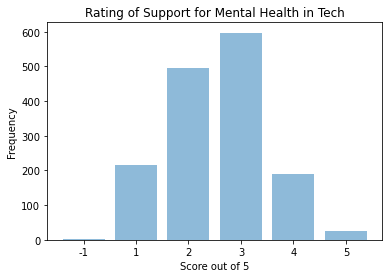

In [208]:
plt.bar(overall_support.index, overall_support.values, alpha = 0.5)
plt.title('Rating of Support for Mental Health in Tech')
plt.xlabel('Score out of 5')
plt.ylabel('Frequency')
plt.show()

In [263]:
overall_employer_mental=pivoted_df\
.groupby(['SurveyID','Overall, how much importance does your employer place on mental health?'])\
.count().iloc[:,1]
overall_employer_mental

SurveyID  Overall, how much importance does your employer place on mental health?
2017      -1                                                                         113
          0                                                                           35
          1                                                                           17
          10                                                                          18
          2                                                                           43
          3                                                                           66
          4                                                                           53
          5                                                                          158
          6                                                                           66
          7                                                                           96
          8                 

In [303]:
overall_employer_mental_df = pd.DataFrame(overall_employer_mental).reset_index()
overall_employer_mental_df = overall_employer_mental_df.reset_index()
overall_employer_mental_df = overall_employer_mental_df.rename\
(columns={"Overall, how much importance does your employer place on mental health?": "QuestionRating",\
          "Are you openly identified at work as a person with a mental health issue?": "Count"})
overall_employer_mental_df

,index,SurveyID,QuestionRating,Count
0,0,2017,-1,113
1,1,2017,0,35
2,2,2017,1,17
3,3,2017,10,18
4,4,2017,2,43
5,5,2017,3,66
6,6,2017,4,53
7,7,2017,5,158
8,8,2017,6,66
9,9,2017,7,96


In [304]:
overall_employer_mental_df.columns

Index(['index', 'SurveyID', 'QuestionRating', 'Count'], dtype='object')

In [325]:
overall_employer_mental_df = overall_employer_mental_df.pivot(index='SurveyID',\
                                                              columns='QuestionRating',\
                                                              values = 'Count')

KeyError: 'SurveyID'

In [324]:
overall_employer_mental_df = overall_employer_mental_df.rename(columns={'-1':'No Response'})
overall_employer_mental_df

QuestionRating,No Response,0,1,10,2,3,4,5,6,7,8,9
SurveyID,,,,,,,,,,,,
2017,113,35,17,18,43,66,53,158,66,96,71,20
2018,56,31,15,11,28,35,31,84,39,45,32,10
2019,48,21,16,12,24,35,20,70,28,38,30,10


In [327]:
overall_employer_mental_df = overall_employer_mental_df[['No Response', '0', '1', '2','3','4','5','6','7','8','9','10']]
overall_employer_mental_df

QuestionRating,No Response,0,1,2,3,4,5,6,7,8,9,10
SurveyID,,,,,,,,,,,,
2017,113,35,17,43,66,53,158,66,96,71,20,18
2018,56,31,15,28,35,31,84,39,45,32,10,11
2019,48,21,16,24,35,20,70,28,38,30,10,12


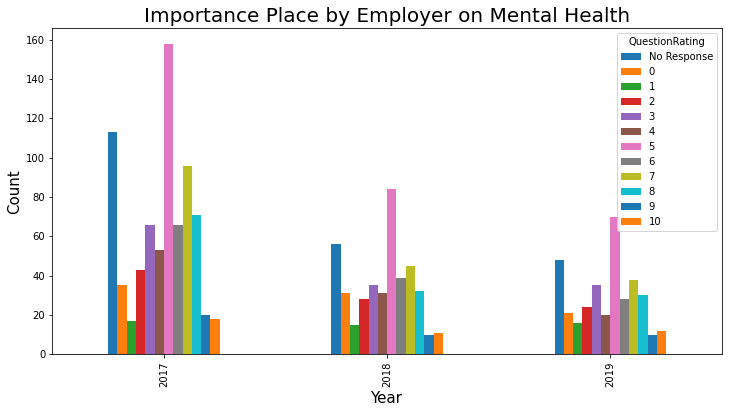

In [328]:
overall_employer_mental_df.plot(kind='bar', figsize=(12,6))
plt.title('Importance Place by Employer on Mental Health', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()

In [ ]:
def create_grouped_bar_chart(color1, ):
    
    labels = [1,2,3,4,5]
    y2017 = [102,255,300,86,11]
    y2018 = [66,133,156,57,5]
    y2019 = [49,106,141,48,8]

    x = np.arange(len(labels))
    width = 0.3

    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(x-0.3, y2017, width, color1='lightskyblue', align='center', label = '2017')
    ax.bar(x, y2018, width, color2='dodgerblue', align='center', label = '2018')
    ax.bar(x+0.3, y2019, width, color3='navy', align='center', label = '2019')
    ax.set_title('Rating of Support for Mental Health in Tech', fontsize=20)
    ax.set_xlabel('Score', fontsize=15)
    ax.set_ylabel('Frequency', fontsize=15)
    plt.xticks(x, labels)
    ax.legend()

    fig.tight_layout()

    plt.show()
    return

In [260]:
overall_employer_physical=pivoted_df\
.groupby(['SurveyID','Overall, how much importance does your employer place on physical health?'])\
.count().iloc[:,1]
overall_by_year

SurveyID  Overall, how much importance does your employer place on mental health?
2017      -1                                                                         113
          0                                                                           35
          1                                                                           17
          10                                                                          18
          2                                                                           43
          3                                                                           66
          4                                                                           53
          5                                                                          158
          6                                                                           66
          7                                                                           96
          8                 

In [256]:
overall_prev_mental=pivoted_df\
.groupby(['SurveyID','Overall, how much importance did your previous employer place on mental health?'])\
.count().iloc[:,1]
overall_by_year

SurveyID  Overall, how well do you think the tech industry supports employees with mental health issues?
2017      -1                                                                                                  2
          1                                                                                                 102
          2                                                                                                 255
          3                                                                                                 300
          4                                                                                                  86
          5                                                                                                  11
2018      1                                                                                                  66
          2                                                                                                 133

In [262]:
overall_prev_physical=pivoted_df\
.groupby(['SurveyID','Overall, how much importance did your previous employer place on physical health?'])\
.count().iloc[:,1]
overall_by_year

SurveyID  Overall, how much importance does your employer place on mental health?
2017      -1                                                                         113
          0                                                                           35
          1                                                                           17
          10                                                                          18
          2                                                                           43
          3                                                                           66
          4                                                                           53
          5                                                                          158
          6                                                                           66
          7                                                                           96
          8                 

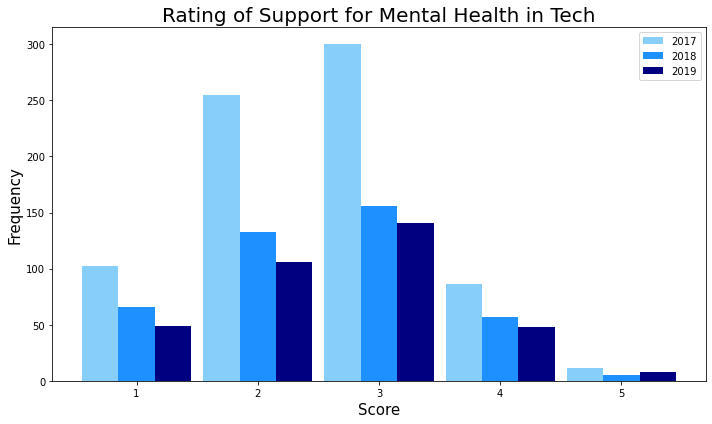

In [254]:

labels = [1,2,3,4,5]
y2017 = [102,255,300,86,11]
y2018 = [66,133,156,57,5]
y2019 = [49,106,141,48,8]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x-0.3, y2017, width, color='lightskyblue', align='center', label = '2017')
ax.bar(x, y2018, width, color='dodgerblue', align='center', label = '2018')
ax.bar(x+0.3, y2019, width, color='navy', align='center', label = '2019')
ax.set_title('Rating of Support for Mental Health in Tech', fontsize=20)
ax.set_xlabel('Score', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

In [177]:
pivoted_df.head()

QuestionText    Any additional notes or comments  \
SurveyID UserID                                    
2014     1                                    -1   
         2                                    -1   
         3                                    -1   
         4                                    -1   
         5                                    -1   

QuestionText    Are you openly identified at work as a person with a mental health issue?  \
SurveyID UserID                                                                             
2014     1                                                     NaN                          
         2                                                     NaN                          
         3                                                     NaN                          
         4                                                     NaN                          
         5                                                     NaN                          

QuestionText    Are you self-employed?  \
SurveyID UserID                          
2014     1                          -1   
         2                          -1   
         3                          -1   
         4                          -1   
         5                          -1   

QuestionText    Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.  \
SurveyID UserID                                                                                                                                     
2014     1                                                     NaN                                                                                  
         2                                                     NaN                                                                                  
         3                                                     NaN                                                                                  
         4                                                     NaN                                                                                  
         5                                                     NaN                                                                                  

QuestionText    Describe the circumstances of the badly handled or unsupportive response.  \
SurveyID UserID                                                                             
2014     1                                                     NaN                          
         2                                                     NaN                          
         3                                                     NaN                          
         4                                                     NaN                          
         5                                                     NaN                          

QuestionText    Describe the circumstances of the supportive or well handled response.  \
SurveyID UserID                                                                          
2014     1                                                     NaN                       
         2                                                     NaN                       
         3                                                     NaN                       
         4                                                     NaN                       
         5                                                     NaN                       

QuestionText    Describe the conversation with coworkers you had about your mental health including their reactions.  \
SurveyID UserID                                                                                                        
2014     1                                                     NaN                                                     
 

In [258]:
overall_prev_physical=pivoted_df\
.groupby(['SurveyID','Overall, how much importance did your previous employer place on physical health?'])\
.count().iloc[:,1]
overall_by_year

SurveyID  Overall, how well do you think the tech industry supports employees with mental health issues?
2017      -1                                                                                                  2
          1                                                                                                 102
          2                                                                                                 255
          3                                                                                                 300
          4                                                                                                  86
          5                                                                                                  11
2018      1                                                                                                  66
          2                                                                                                 133

In [20]:
Males = (answer_df.AnswerText == 'Male').sum() + (answer_df.AnswerText == 'male').sum()
Males

3042

In [21]:
Females = (answer_df.AnswerText == 'Female').sum() + (answer_df.AnswerText == 'female').sum()
Females

1024

In [22]:
Nonbinary = (answer_df.AnswerText == 'Nonbinary').sum() + (answer_df.AnswerText == 'nonbinary').sum()
Nonbinary

9

Word Clouds generated from Survey Responses

In [96]:
answer3 = pivoted_df.iloc[:,3].values
answer3

array([nan, nan, nan, ..., 'sdsdsdsdsdsd', 'raise awareness',
       'reduce stigma. offer options for part time work. not use an EAP as their only mental health coverage.'],
      dtype=object)

In [97]:
pd.isnull(answer3)

array([ True,  True,  True, ..., False, False, False])

In [98]:
answer3 = np.delete(answer3, np.where(pd.isnull(answer3))).astype(str)
answer3

array(["They don't take it seriously",
       'raise awareness, talk about it to lessen the stigma',
       'Education and awareness, statistics, add supportive writing to the company handbook',
       ..., 'sdsdsdsdsdsd', 'raise awareness',
       'reduce stigma. offer options for part time work. not use an EAP as their only mental health coverage.'],
      dtype='<U1842')

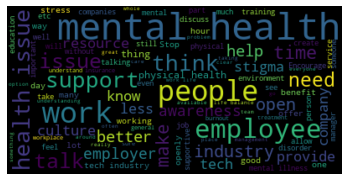

In [140]:
# Start with one review:
# Name: Briefly describe what you think the industry as a whole and/or employers could do 
# to improve mental health support for employees.
# text = pivoted_df.iloc[:,3].values

# Create and generate a word cloud image:
text = " ".join(response for response in answer3)
wordcloud = WordCloud(max_words=100, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud above highlights key words including: culture, awareness, stigma, support, open, talk, need, better, help. These are important concepts for companies to think about. How does a company's culture impact burnout? Is there a stigma? How is awareness communicated? What are employees needing? What can a company do better to support employees?

In [108]:
pivoted_df.columns.get_loc('Describe the circumstances of the badly handled or unsupportive response.')

4

In [112]:
answer4 = pivoted_df.iloc[:,4].values
pd.isnull(answer4)
answer4 = np.delete(answer4, np.where(pd.isnull(answer4))).astype(str)
answer4

array(['-1',
       'During a discussion about "mental health first aider" at work, a coworker dismissed the whole idea, saying that "no one here suffers from Mental Health Disorder"',
       'I was suffering depression and I was open about that, that is why my numbers fell, but then I started drinking too much and admitted myself into a detox/psych facility to get better... 5 days later I get out to find myself fired',
       ..., '-1', '-1', '-1'], dtype='<U1127')

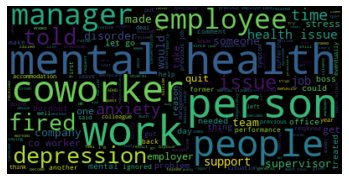

In [141]:
text = " ".join(response for response in answer4)
#stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords = stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I was unable to make a word cloud for question 5: Describe the circumstances of the supportive or well handled response. There were no responses.

In [129]:
pivoted_df.columns.get_loc('Describe the circumstances of the supportive or well handled response.')

5

In [131]:
answer5 = pivoted_df.iloc[:,5].values
pd.isnull(answer5)
answer5 = np.delete(answer5, np.where(pd.isnull(answer5))).astype(str)
answer5

array(['-1', '-1', '-1', ..., '-1', '-1', '-1'], dtype='<U2')

In [143]:
#text = " ".join(response for response in answer5)
#stopwords = set(stopwords.words('english'))
#wordcloud = WordCloud(stopwords = stopwords).generate(text)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

Describe the conversation with coworkers you had about your mental health including their reactions

In [133]:
answer6 = pivoted_df.iloc[:,6].values
pd.isnull(answer6)
answer6 = np.delete(answer6, np.where(pd.isnull(answer6))).astype(str)
answer6

array(['Spoke about my anxiety they were very supportive',
       'the coworker was comprehensive, empathetic and understanding',
       'They all seemed understanding and some even admitted to having some issues themselves',
       ..., '-1', '-1',
       'I\'ve discussed mental illness with coworkers not in my business unit whom I have a primarily social relationship with. Even then I speak in very vague terms ("I\'m not doing great this week", "have some mental health stuff going on"). One of the coworkers I play board games with during lunch on Fridays has expressed concern when I\'m not in the office for board games or for the weekly catered lunch. \n\nThey\'ve been supportive, but also had the deer-in-headlights "I have no clue what to say here" look that makes me hesitant to share in the future. \n\nI\'m not comfortable sharing information about my mental health with the folks I work with on a daily basis.'],
      dtype='<U746')

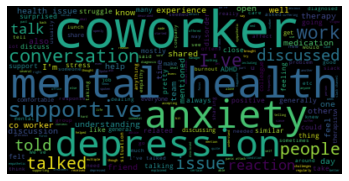

In [144]:
text = " ".join(response for response in answer6)
#stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords = stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.

In [145]:
answer7 = pivoted_df.iloc[:,7].values
pd.isnull(answer7)
answer7 = np.delete(answer7, np.where(pd.isnull(answer7))).astype(str)
answer7

array(['-1', '-1',
       'The conversation went well, he too suffers mental illness... however, I was just fired for having a mental illness episode and not being about to get my work done.',
       ..., '-1', '-1',
       "My current manager will be retiring in the next few months. We've talked about my mental illness and related mental health issues, but I'd be a lot less comfortable talking about it with my new/next manager. During a period when I wasn't doing well, my manager didn't feel like they could ask about how I was doing, or about what kind of support would be helpful. They were relieved when I (without a direct ask from them) let them know that I was not actively suicidal. They talked through some options with me, and expressed that it would be okay for me to take a leave-of-absence for a mental illness (with proper documentation). \n\nI navigated setting up intermittent FMLA leave on my own, with the LOA company that our company outsources all LOA-related info to. Severa

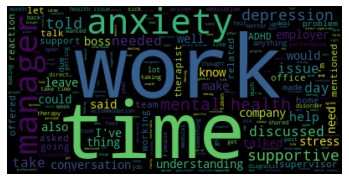

In [146]:
text = " ".join(response for response in answer7)
#stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords = stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Hypothesis Testing
$H_0$: Burnout rates will be the same or less for females than males.

$H_a$: Burnout rates will be higher for females than males.